# **Exploratory Data Analysis**

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Dataset Description

**Data fields**
- id - a unique identifier for each trip
- vendor_id - a code indicating the provider associated with the trip record
- pickup_datetime - date and time when the meter was engaged
- dropoff_datetime - date and time when the meter was disengaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged
- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
- trip_duration - duration of the trip in seconds

### Machine learning solution will be predicting taxi trip durations based on individual trip attributes. 

## Load Dataset

In [108]:
df = pd.read_csv('nyc_taxi_trip_duration.csv')
df = df.sample(frac=0.25, random_state=10)

## Explore the Data

In [109]:
df.shape

(364661, 11)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364661 entries, 112342 to 786613
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  364661 non-null  object 
 1   vendor_id           364661 non-null  int64  
 2   pickup_datetime     364661 non-null  object 
 3   dropoff_datetime    364661 non-null  object 
 4   passenger_count     364661 non-null  int64  
 5   pickup_longitude    364661 non-null  float64
 6   pickup_latitude     364661 non-null  float64
 7   dropoff_longitude   364661 non-null  float64
 8   dropoff_latitude    364661 non-null  float64
 9   store_and_fwd_flag  364661 non-null  object 
 10  trip_duration       364661 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 33.4+ MB


In [111]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
112342,id2631171,2,2016-01-23 00:09:14,2016-01-23 00:20:14,1,-74.006615,40.731712,-73.991890,40.727161,N,660
840803,id2892416,1,2016-02-10 19:24:14,2016-02-10 19:54:47,3,-73.963203,40.777924,-74.004059,40.747654,N,1833
184538,id3095142,2,2016-05-12 06:39:26,2016-05-12 06:47:36,1,-73.987595,40.719822,-74.010994,40.716148,N,490
512001,id3803823,2,2016-01-21 08:31:03,2016-01-21 08:43:50,1,-73.969055,40.763618,-73.974129,40.778679,N,767
776055,id3155730,2,2016-01-02 13:12:33,2016-01-02 13:15:52,2,-73.950165,40.775635,-73.944534,40.779636,N,199


In [112]:
df['dropoff_datetime'].min()

'2016-01-01 00:12:42'

In [113]:
df['dropoff_datetime'].max()

'2016-07-01 13:26:40'

In [114]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [115]:
(df.isnull().sum()/(len(df)))*100

id                    0.0
vendor_id             0.0
pickup_datetime       0.0
dropoff_datetime      0.0
passenger_count       0.0
pickup_longitude      0.0
pickup_latitude       0.0
dropoff_longitude     0.0
dropoff_latitude      0.0
store_and_fwd_flag    0.0
trip_duration         0.0
dtype: float64

#### No missing data in this dataset.
#### If there are any missing data, first identify types of missing data (MCAR, MAR, MNAR) and then approach the problem with appropriate techniques

In [116]:
df.nunique()

id                    364661
vendor_id                  2
pickup_datetime       359649
dropoff_datetime      359550
passenger_count            9
pickup_longitude       16806
pickup_latitude        34806
dropoff_longitude      22718
dropoff_latitude       44747
store_and_fwd_flag         2
trip_duration           5407
dtype: int64

In [117]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
vendor_id,364661.0,1.535958,0.498706,1.000000,1.000000,2.000000,2.000000,2.000000
passenger_count,364661.0,1.666049,1.316111,0.000000,1.000000,1.000000,2.000000,9.000000
pickup_longitude,364661.0,-73.973406,0.044367,-77.440750,-73.991875,-73.981705,-73.967285,-61.335529
pickup_latitude,364661.0,40.750939,0.031035,35.310307,40.737442,40.754108,40.768391,41.319164
dropoff_longitude,364661.0,-73.973412,0.043817,-79.817978,-73.991341,-73.979790,-73.963036,-61.335529
dropoff_latitude,364661.0,40.751834,0.035182,35.173546,40.735840,40.754559,40.769878,41.480755
trip_duration,364661.0,954.927448,3203.464143,1.000000,397.000000,662.000000,1076.000000,86390.000000


## Preliminary Feature Engineering

### Create new features from pickup_datetime and dropoff_datetime

In [118]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364661 entries, 112342 to 786613
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  364661 non-null  object        
 1   vendor_id           364661 non-null  int64         
 2   pickup_datetime     364661 non-null  datetime64[ns]
 3   dropoff_datetime    364661 non-null  datetime64[ns]
 4   passenger_count     364661 non-null  int64         
 5   pickup_longitude    364661 non-null  float64       
 6   pickup_latitude     364661 non-null  float64       
 7   dropoff_longitude   364661 non-null  float64       
 8   dropoff_latitude    364661 non-null  float64       
 9   store_and_fwd_flag  364661 non-null  object        
 10  trip_duration       364661 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 33.4+ MB


#### Extract hour, week day and month from pickup datetime in order to engineer a set of new features from available datetime columns.
#### Only pickup columns will be used since for the majority of rows pickup columns will be the same as dropoff.
#### Probably an hour column needs to be investigated closely, let's leave it for now and revisit in the next iteration of feature engineering.

In [120]:
df['pickup_day'] = df['pickup_datetime'].dt.day_name()
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_month'] = df['pickup_datetime'].dt.month

In [121]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_weekday,pickup_hour,pickup_month
112342,id2631171,2,2016-01-23 00:09:14,2016-01-23 00:20:14,1,-74.006615,40.731712,-73.991890,40.727161,N,660,Saturday,5,0,1
840803,id2892416,1,2016-02-10 19:24:14,2016-02-10 19:54:47,3,-73.963203,40.777924,-74.004059,40.747654,N,1833,Wednesday,2,19,2
184538,id3095142,2,2016-05-12 06:39:26,2016-05-12 06:47:36,1,-73.987595,40.719822,-74.010994,40.716148,N,490,Thursday,3,6,5
512001,id3803823,2,2016-01-21 08:31:03,2016-01-21 08:43:50,1,-73.969055,40.763618,-73.974129,40.778679,N,767,Thursday,3,8,1
776055,id3155730,2,2016-01-02 13:12:33,2016-01-02 13:15:52,2,-73.950165,40.775635,-73.944534,40.779636,N,199,Saturday,5,13,1


### Calculate Haversine great-circle distance

In [122]:
def calculate_haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculates the Haversine great-circle distance between two points
    on a sphere given their longitudes and latitudes.
    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])    
    dlon = lon2 - lon1
    dlat = lat2 - lat1   
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    haversine_distance = 6378.137 * c
    
    return haversine_distance

In [123]:
df['haversine_distance'] = calculate_haversine_distance(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_weekday,pickup_hour,pickup_month,haversine_distance
112342,id2631171,2,2016-01-23 00:09:14,2016-01-23 00:20:14,1,-74.006615,40.731712,-73.991890,40.727161,N,660,Saturday,5,0,1,1.341484
840803,id2892416,1,2016-02-10 19:24:14,2016-02-10 19:54:47,3,-73.963203,40.777924,-74.004059,40.747654,N,1833,Wednesday,2,19,2,4.818762
184538,id3095142,2,2016-05-12 06:39:26,2016-05-12 06:47:36,1,-73.987595,40.719822,-74.010994,40.716148,N,490,Thursday,3,6,5,2.016166
512001,id3803823,2,2016-01-21 08:31:03,2016-01-21 08:43:50,1,-73.969055,40.763618,-73.974129,40.778679,N,767,Thursday,3,8,1,1.730221
776055,id3155730,2,2016-01-02 13:12:33,2016-01-02 13:15:52,2,-73.950165,40.775635,-73.944534,40.779636,N,199,Saturday,5,13,1,0.650929


### Calculate Manhattan distance

In [124]:
def calculate_manhattan_distance(lat1, lon1, lat2, lon2):
    """
    Calculates Manhattan distance between two points using their latitude and longitude.
    """
    a = calculate_haversine_distance(lat1, lon1, lat1, lon2)
    b = calculate_haversine_distance(lat1, lon1, lat2, lon1)
    manhattan_distance = a + b
    
    return manhattan_distance

In [125]:
df['manhattan_distance'] = df.apply(lambda row: calculate_manhattan_distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_weekday,pickup_hour,pickup_month,haversine_distance,manhattan_distance
112342,id2631171,2,2016-01-23 00:09:14,2016-01-23 00:20:14,1,-74.006615,40.731712,-73.991890,40.727161,N,660,Saturday,5,0,1,1.341484,1.748711
840803,id2892416,1,2016-02-10 19:24:14,2016-02-10 19:54:47,3,-73.963203,40.777924,-74.004059,40.747654,N,1833,Wednesday,2,19,2,4.818762,6.813560
184538,id3095142,2,2016-05-12 06:39:26,2016-05-12 06:47:36,1,-73.987595,40.719822,-74.010994,40.716148,N,490,Thursday,3,6,5,2.016166,2.383142
512001,id3803823,2,2016-01-21 08:31:03,2016-01-21 08:43:50,1,-73.969055,40.763618,-73.974129,40.778679,N,767,Thursday,3,8,1,1.730221,2.104292
776055,id3155730,2,2016-01-02 13:12:33,2016-01-02 13:15:52,2,-73.950165,40.775635,-73.944534,40.779636,N,199,Saturday,5,13,1,0.650929,0.920104


### Convert latitude and longitude to Polar coordinates

In [126]:
def convert_to_polar_coordinates(lat, lon):
    """
    Converts latitude and longitude to polar coordinates.
    """
    # Convert latitude and longitude from degrees to radians
    lat_rad = math.radians(lat)
    lon_rad = math.radians(lon)

    # Convert to polar coordinates
    r = math.sqrt(lat_rad**2 + lon_rad**2)
    phi = math.atan2(lon_rad, lat_rad)

    return r, phi

In [127]:
df['pickup_r'], df['pickup_phi'] = zip(*df.apply(lambda row: convert_to_polar_coordinates(row['pickup_latitude'], row['pickup_longitude']), axis=1))
df['dropoff_r'], df['dropoff_phi'] = zip(*df.apply(lambda row: convert_to_polar_coordinates(row['dropoff_latitude'], row['dropoff_longitude']), axis=1))

In [128]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day,pickup_weekday,pickup_hour,pickup_month,haversine_distance,manhattan_distance,pickup_r,pickup_phi,dropoff_r,dropoff_phi
112342,id2631171,2,2016-01-23 00:09:14,2016-01-23 00:20:14,1,-74.006615,40.731712,-73.991890,40.727161,N,...,Saturday,5,0,1,1.341484,1.748711,1.474370,-1.067662,1.474106,-1.067625
840803,id2892416,1,2016-02-10 19:24:14,2016-02-10 19:54:47,3,-73.963203,40.777924,-74.004059,40.747654,N,...,Wednesday,2,19,2,4.818762,6.813560,1.474095,-1.066935,1.474465,-1.067482
184538,id3095142,2,2016-05-12 06:39:26,2016-05-12 06:47:36,1,-73.987595,40.719822,-74.010994,40.716148,N,...,Thursday,3,6,5,2.016166,2.383142,1.473979,-1.067677,1.474306,-1.067848
512001,id3803823,2,2016-01-21 08:31:03,2016-01-21 08:43:50,1,-73.969055,40.763618,-73.974129,40.778679,N,...,Thursday,3,8,1,1.730221,2.104292,1.474064,-1.067117,1.474268,-1.066989
776055,id3155730,2,2016-01-02 13:12:33,2016-01-02 13:15:52,2,-73.950165,40.775635,-73.944534,40.779636,N,...,Saturday,5,13,1,0.650929,0.920104,1.473876,-1.066884,1.473824,-1.066810


### Calculate bearing

In [129]:
def calculate_bearing(lat1, lon1, lat2, lon2):
    """
    Calculates bearing between two points using their latitude and longitude.
    """
    # Convert latitude and longitude from degrees to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    # Calculate the difference in longitudes
    dlon = lon2 - lon1

    # Calculate the bearing angle
    x = np.sin(dlon) * np.cos(lat2)
    y = np.cos(lat1) * np.sin(lat2) - (np.sin(lat1) * np.cos(lat2) * np.cos(dlon))
    initial_bearing = np.arctan2(x, y)

    # Normalize the initial bearing to 0° ... 360°
    initial_bearing = np.degrees(initial_bearing)
    compass_bearing = (initial_bearing + 360) % 360

    return compass_bearing

In [130]:
df['bearing'] = df.apply(lambda row: calculate_bearing(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_weekday,pickup_hour,pickup_month,haversine_distance,manhattan_distance,pickup_r,pickup_phi,dropoff_r,dropoff_phi,bearing
112342,id2631171,2,2016-01-23 00:09:14,2016-01-23 00:20:14,1,-74.006615,40.731712,-73.991890,40.727161,N,...,5,0,1,1.341484,1.748711,1.474370,-1.067662,1.474106,-1.067625,112.183219
840803,id2892416,1,2016-02-10 19:24:14,2016-02-10 19:54:47,3,-73.963203,40.777924,-74.004059,40.747654,N,...,2,19,2,4.818762,6.813560,1.474095,-1.066935,1.474465,-1.067482,225.645152
184538,id3095142,2,2016-05-12 06:39:26,2016-05-12 06:47:36,1,-73.987595,40.719822,-74.010994,40.716148,N,...,3,6,5,2.016166,2.383142,1.473979,-1.067677,1.474306,-1.067848,258.305158
512001,id3803823,2,2016-01-21 08:31:03,2016-01-21 08:43:50,1,-73.969055,40.763618,-73.974129,40.778679,N,...,3,8,1,1.730221,2.104292,1.474064,-1.067117,1.474268,-1.066989,345.689279
776055,id3155730,2,2016-01-02 13:12:33,2016-01-02 13:15:52,2,-73.950165,40.775635,-73.944534,40.779636,N,...,5,13,1,0.650929,0.920104,1.473876,-1.066884,1.473824,-1.066810,46.814269


## EDA Univariate Analysis

### Vendor ID

In [131]:
df['vendor_id'].value_counts()

vendor_id
2    195443
1    169218
Name: count, dtype: int64

<Axes: xlabel='vendor_id', ylabel='percent'>

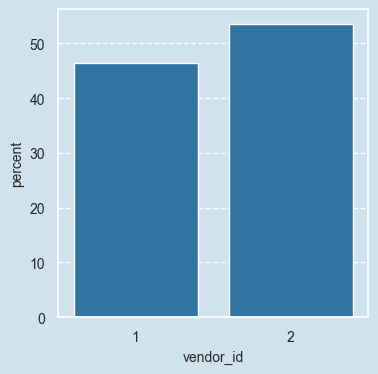

In [132]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(4, 4), 'grid.linestyle': '--'})

sns.countplot(data=df, x='vendor_id', stat="percent", color="#1f77b4")

#### - Both vendors are almost equally represented in the dataset, with vendor 2 having slightly more trips than vendor 1.

### Passenger Count

In [133]:
df['passenger_count'].value_counts()

passenger_count
1    258248
2     52553
5     19448
3     15034
6     12200
4      7156
0        19
7         2
9         1
Name: count, dtype: int64

#### - There are 19 definite outliers with 0 passengers.
#### - Only 1 trip recorded with 9 passengers and 2 trips with 7 passengers, we can assume that these are outliers, although it could be a case with adult passengers travelling with kids - needs farther investigation.

In [134]:
df = df[df['passenger_count'] > 0]
df = df[df['passenger_count'] < 7]

<Axes: xlabel='passenger_count', ylabel='percent'>

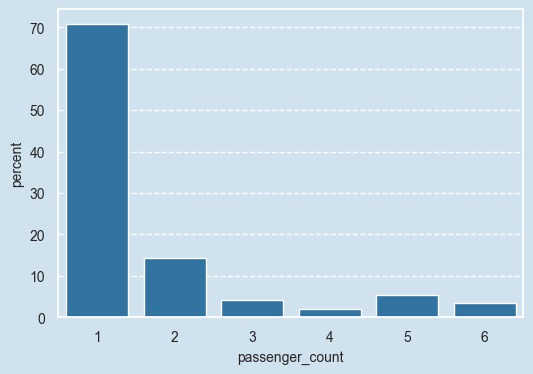

In [135]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(6, 4), 'grid.linestyle': '--'})

sns.countplot(data=df, x='passenger_count', stat="percent", color="#1f77b4")

#### - As expected, the highest number of trips are with 1 passenger.
#### - Interestingly, 5 passengers have more trips than 3 and 4. Investigate later.

### Latitude and Longitude

#### The original dataset had a lot of outliers in lat and lon, I noticed this when I plotted pickup and dropoff locations on a scatterplot and compared with the lat and lon of New York city.
#### Threfore, the lat and lon columns were filtered to approx. boundaries of New York city for this task. In order to improve these features, a farther more thorough filtering needs to be implemented.

In [136]:
df = df[df['pickup_longitude'] <= -73.75]
df = df[df['pickup_longitude'] >= -74.03]
df = df[df['pickup_latitude'] <= 40.85]
df = df[df['pickup_latitude'] >= 40.63]
df = df[df['dropoff_longitude'] <= -73.75]
df = df[df['dropoff_longitude'] >= -74.03]
df = df[df['dropoff_latitude'] <= 40.85]
df = df[df['dropoff_latitude'] >= 40.63]

In [137]:
df.shape

(359694, 22)

In [138]:
longitude = list(df.pickup_longitude) + list(df.dropoff_longitude)
latitude = list(df.pickup_latitude) + list(df.dropoff_latitude)

Text(0.5, 1.0, 'Pickup and dropoff locations')

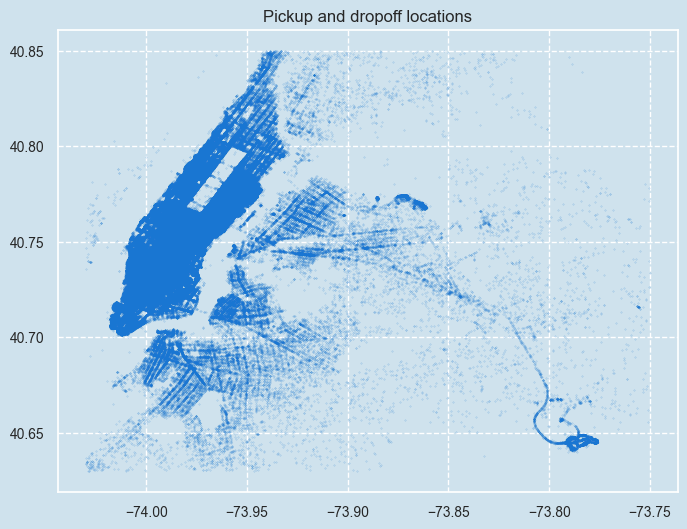

In [139]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(8, 6), 'grid.linestyle': '--'})

plt.plot(longitude, latitude, '.', alpha=.4, markersize=.5, color="#1976d2")
plt.title('Pickup and dropoff locations')

#### - Clearly the majority of trips are taken in Manhattan area.
#### - We can see trips to two major NYC airports, JFK and LaGuardia.

Text(0.5, 1.0, 'Dropoff Locations')

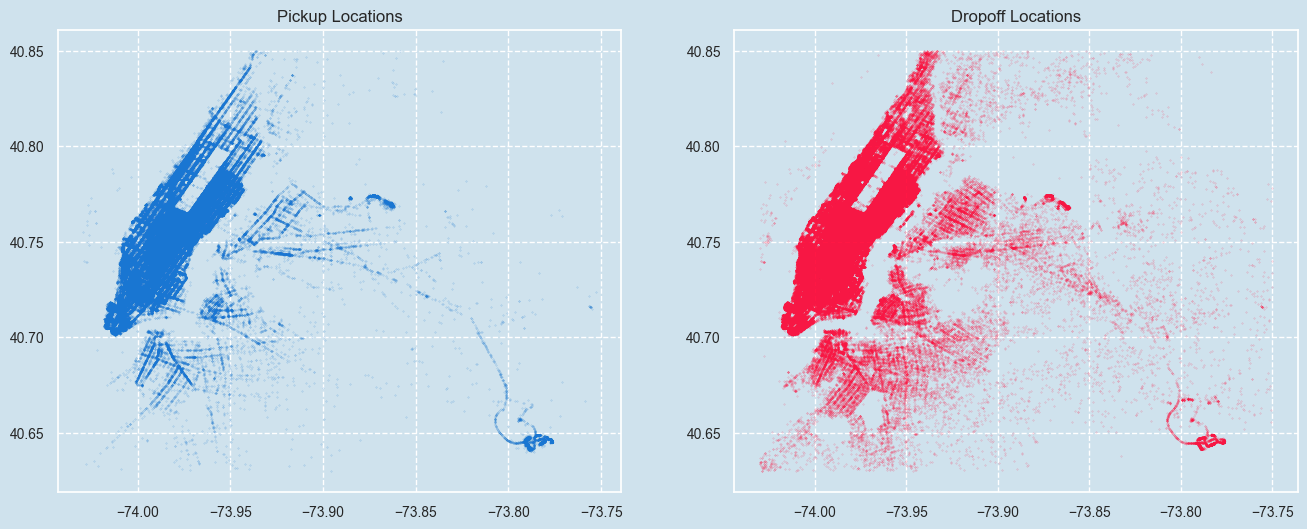

In [140]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(16, 6), 'grid.linestyle': '--'})

plt.subplots_adjust(hspace=0.2)

plt.subplot(1, 2, 1)
plt.plot(df['pickup_longitude'], df['pickup_latitude'], '.', alpha=.4, markersize=.5, color="#1976d2")
plt.title('Pickup Locations')

plt.subplot(1, 2, 2)
plt.plot(df['dropoff_longitude'], df['dropoff_latitude'], '.', alpha=.4, markersize=.5, color="#ff1744")
plt.title('Dropoff Locations')

#### - Pickup locations are mostly located in Manhattan area and major streets, which is expected.
#### - Dropoff locations are more spreaded in smaller streets and suburban areas.

### Store and Forward Flag

In [141]:
df['store_and_fwd_flag'].value_counts(normalize=True)

store_and_fwd_flag
N    0.994601
Y    0.005399
Name: proportion, dtype: float64

#### - About 0.5% of trips were stored before forwarding.
#### - Heavily unbalanced feature, not suitable for modelling.

### Trips by Weekday

<Axes: xlabel='pickup_day', ylabel='percent'>

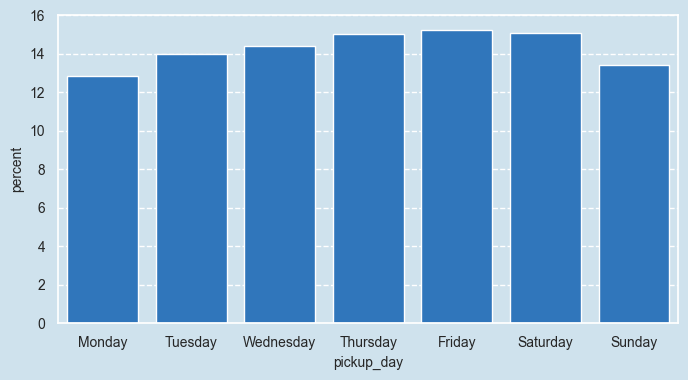

In [142]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(8, 4), 'grid.linestyle': '--'})

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x=df['pickup_day'], stat="percent", order=order, color="#1976d2")

#### - Number of trips are gradually increasing starting from Monday, culminating on Friday with just above 15%.
#### - Saturday is almost as busy as Friday, while Sunday has number of trips dropped to almost Monday levels. 

### Trips by Hour

<Axes: xlabel='pickup_hour', ylabel='percent'>

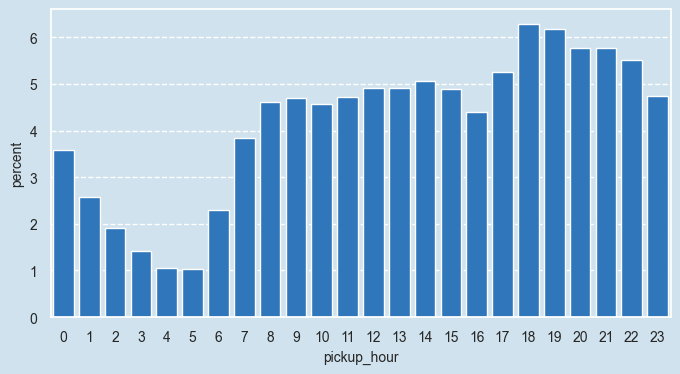

In [143]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(8, 4), 'grid.linestyle': '--'})

sns.countplot(data=df, x=df['pickup_hour'], stat="percent", color="#1976d2")

#### - As expected, the least busiest hours are 4 and 5.
#### - Number of trips is increasing gradually starting from 6, roughly plateauing between 8 and 17.
#### - Starting from 17 the number of trips are increasing with the peak at 18 and 19. This is expected as people are travelling from offices back to their homes.

### Trips by Month

<Axes: xlabel='pickup_month', ylabel='percent'>

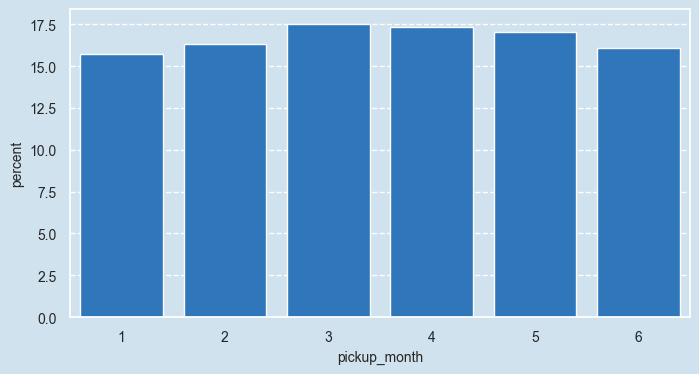

In [144]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(8, 4), 'grid.linestyle': '--'})

sns.countplot(data=df, x=df['pickup_month'], stat="percent", color="#1976d2")

#### - This dataset has only 6 months of data, from January to June. Would be nice to have a full year - possible improvement.
#### - Number of trips are almost evenly distributed, with March and April having the highest number of trips - interesting to investigate why?

### Trip Duration - Target Variable

In [145]:
df['trip_duration'].sort_values(ascending=False)

73816      86390
753765     86379
1221666    86378
66346      86377
1282413    86365
           ...  
451396         1
761666         1
279493         1
726971         1
1439166        1
Name: trip_duration, Length: 359694, dtype: int64

#### - 86K sec (approx. 24 hours) are probably outliers. Possibly investigate in the next iteration of model improvements.
#### - 1 sec trips are probably had some technical glitches or cancelled trips. 
#### - Farther investigation revealed that there are some trips with 1 sec duration, but actually having different lat and log meaning that taxi was moved.
#### - There are clear indicators that there are outliers in this variable that needs to be investigated more thoroughly.
#### - For the first iteration of model, a z-score is used to identify and remove outliers.

In [147]:
df['trip_duration'].mean() / 60

15.687235400090078

<Axes: xlabel='trip_duration'>

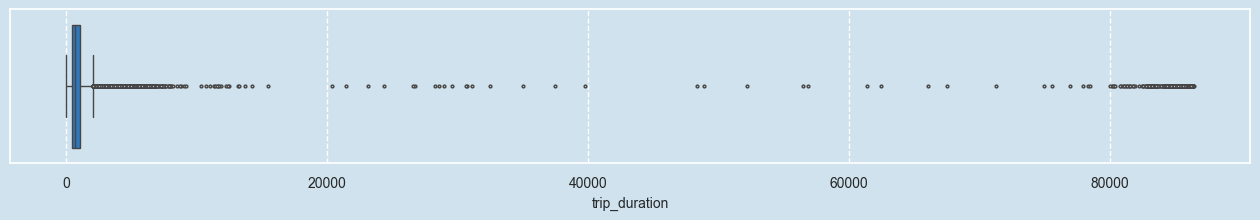

In [148]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(16, 2), 'grid.linestyle': '--'})

sns.boxplot(x=df["trip_duration"], flierprops=dict(markerfacecolor='0.75', markersize=2), color="#1976d2")

In [149]:
df['trip_duration_zscore'] = (df['trip_duration'] - df['trip_duration'].mean())/df['trip_duration'].std(ddof=0)
df.sort_values(by=['trip_duration_zscore'], ascending=False).head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour,pickup_month,haversine_distance,manhattan_distance,pickup_r,pickup_phi,dropoff_r,dropoff_phi,bearing,trip_duration_zscore
73816,id0953667,2,2016-05-06 00:00:10,2016-05-07 00:00:00,1,-73.996010,40.753220,-73.979027,40.740601,N,...,0,5,2.006169,2.836882,1.474388,-1.067378,1.474023,-1.067412,134.438432,26.766388
753765,id2589925,2,2016-05-17 22:22:56,2016-05-18 22:22:35,4,-74.006111,40.734680,-73.958809,40.815449,N,...,22,5,9.835698,12.981118,1.474387,-1.067628,1.474344,-1.066521,23.901930,26.762942
1221666,id3346235,2,2016-05-09 15:59:04,2016-05-10 15:58:42,5,-73.982658,40.761963,-73.988976,40.743023,N,...,15,5,2.174646,2.641028,1.474258,-1.067211,1.474195,-1.067444,194.181914,26.762629
66346,id2307896,2,2016-05-14 04:48:05,2016-05-15 04:47:42,1,-74.000504,40.732121,-73.994202,40.712418,N,...,4,5,2.256838,2.724909,1.474280,-1.067623,1.474017,-1.067791,166.372019,26.762316
1282413,id3741436,2,2016-02-21 00:46:56,2016-02-22 00:46:21,3,-73.986298,40.734531,-73.992271,40.749088,N,...,0,2,1.696987,2.124365,1.474083,-1.067517,1.474297,-1.067400,342.730132,26.758557


[(-3.0, 3.0)]

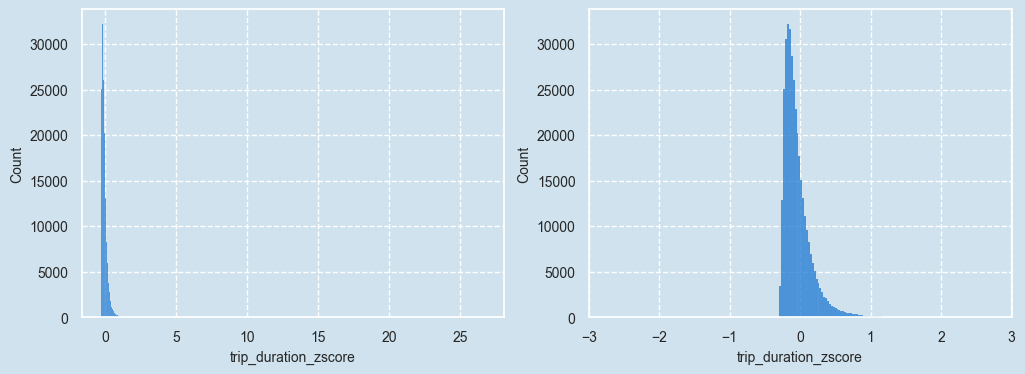

In [150]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(12, 4), 'grid.linestyle': '--'})

plt.subplots_adjust(hspace=0.3)

plt.subplot(1, 2, 1)
sns.histplot(df['trip_duration_zscore'], kde=False, bins=1000, color="#1976d2")

plt.subplot(1, 2, 2)
g = sns.histplot(df['trip_duration_zscore'], kde=False, bins=1000, color="#1976d2")
g.set(xlim=(-3, 3))

#### To train model v0 I will remove rows where trip duration more than 2 standard deviations from the mean.
#### But target variavle outlier handling step should be revisited in the next iterations of model improvements.

In [151]:
df = df[df['trip_duration_zscore'] <= 2]

In [152]:
df.shape

(359143, 23)

In [153]:
df.drop(['trip_duration_zscore'], axis=1, inplace=True)

<Axes: xlabel='trip_duration'>

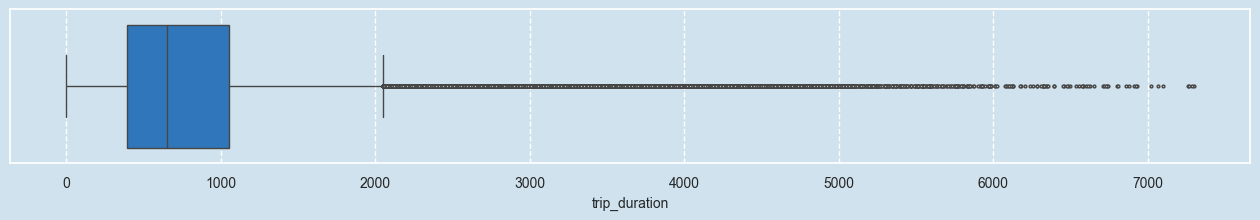

In [154]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(16, 2), 'grid.linestyle': '--'})

sns.boxplot(x=df["trip_duration"], flierprops=dict(markerfacecolor='0.75', markersize=2), color="#1976d2")

In [155]:
# df['trip_duration_log'] = np.log(df['trip_duration'])

<Axes: xlabel='trip_duration', ylabel='Count'>

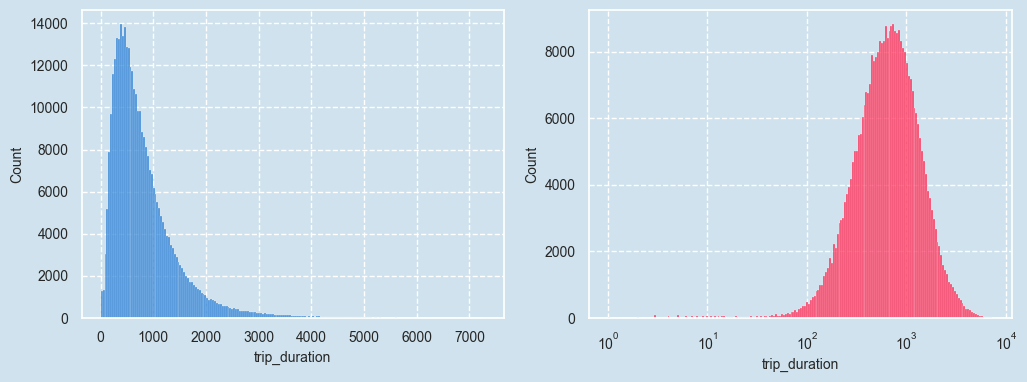

In [156]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(12, 4), 'grid.linestyle': '--'})

plt.subplots_adjust(hspace=0.3)

plt.subplot(1, 2, 1)
sns.histplot(df['trip_duration'], kde=False, bins=200, color="#1976d2")

plt.subplot(1, 2, 2)
sns.histplot(df['trip_duration'], kde=False, bins=200, log_scale=True, color="#ff1744")

#### Possibly consider using log transformation of target variable.

In [157]:
df[df['trip_duration'] < 5].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_weekday,pickup_hour,pickup_month,haversine_distance,manhattan_distance,pickup_r,pickup_phi,dropoff_r,dropoff_phi,bearing
649597,id1353306,2,2016-06-17 17:03:26,2016-06-17 17:03:29,1,-74.005302,40.745800,-74.005302,40.745800,N,...,4,17,6,0.000000,0.000000,1.474468,-1.067508,1.474468,-1.067508,0.000000
1322083,id2450646,1,2016-05-26 16:49:36,2016-05-26 16:49:39,1,-73.977142,40.761185,-73.977089,40.761173,N,...,3,16,5,0.004680,0.005777,1.474167,-1.067188,1.474166,-1.067188,105.796654
748696,id0960183,2,2016-04-17 21:41:51,2016-04-17 21:41:55,1,-73.991341,40.727669,-73.991341,40.727669,N,...,6,21,4,0.000000,0.000000,1.474102,-1.067617,1.474102,-1.067617,0.000000
511479,id1000100,2,2016-06-30 09:32:42,2016-06-30 09:32:44,1,-74.005104,40.741100,-74.005104,40.741070,N,...,3,9,6,0.003397,0.003397,1.474425,-1.067556,1.474425,-1.067556,180.000000
1439166,id2943073,2,2016-01-03 16:55:44,2016-01-03 16:55:45,1,-73.975677,40.785488,-73.976372,40.785831,N,...,6,16,1,0.069893,0.096737,1.474349,-1.066928,1.474363,-1.066928,303.149057


In [158]:
df[(df['pickup_longitude'] == df['dropoff_longitude']) & (df['pickup_latitude'] == df['dropoff_latitude'])].shape[0]

1344

In [159]:
df.shape

(359143, 22)

In [160]:
df = df[(df['pickup_longitude'] != df['dropoff_longitude']) & (df['pickup_latitude'] != df['dropoff_latitude'])]
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_weekday,pickup_hour,pickup_month,haversine_distance,manhattan_distance,pickup_r,pickup_phi,dropoff_r,dropoff_phi,bearing
112342,id2631171,2,2016-01-23 00:09:14,2016-01-23 00:20:14,1,-74.006615,40.731712,-73.991890,40.727161,N,...,5,0,1,1.341484,1.748711,1.474370,-1.067662,1.474106,-1.067625,112.183219
840803,id2892416,1,2016-02-10 19:24:14,2016-02-10 19:54:47,3,-73.963203,40.777924,-74.004059,40.747654,N,...,2,19,2,4.818762,6.813560,1.474095,-1.066935,1.474465,-1.067482,225.645152
184538,id3095142,2,2016-05-12 06:39:26,2016-05-12 06:47:36,1,-73.987595,40.719822,-74.010994,40.716148,N,...,3,6,5,2.016166,2.383142,1.473979,-1.067677,1.474306,-1.067848,258.305158
512001,id3803823,2,2016-01-21 08:31:03,2016-01-21 08:43:50,1,-73.969055,40.763618,-73.974129,40.778679,N,...,3,8,1,1.730221,2.104292,1.474064,-1.067117,1.474268,-1.066989,345.689279
776055,id3155730,2,2016-01-02 13:12:33,2016-01-02 13:15:52,2,-73.950165,40.775635,-73.944534,40.779636,N,...,5,13,1,0.650929,0.920104,1.473876,-1.066884,1.473824,-1.066810,46.814269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47179,id1503965,2,2016-06-30 12:57:30,2016-06-30 13:02:52,1,-73.955200,40.783241,-73.948990,40.777271,N,...,3,12,6,0.845993,1.188043,1.474018,-1.066834,1.473872,-1.066860,141.770378
763715,id1850860,2,2016-03-29 05:50:30,2016-03-29 05:55:21,1,-73.992393,40.749302,-74.005875,40.736969,N,...,1,5,3,1.782588,2.509794,1.474300,-1.067398,1.474402,-1.067603,219.635327
201540,id3581409,2,2016-01-07 08:26:35,2016-01-07 08:37:07,2,-74.000946,40.741947,-73.985741,40.743805,N,...,3,8,1,1.299002,1.489256,1.474369,-1.067523,1.474152,-1.067417,80.834413
263216,id2877746,2,2016-03-11 21:37:07,2016-03-11 21:54:38,2,-73.991104,40.750080,-74.016563,40.711006,N,...,4,21,3,4.851004,6.496715,1.474287,-1.067383,1.474347,-1.067933,206.286103


In [161]:
df.shape

(357570, 22)

## EDA Bivariate Analysis

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 357570 entries, 112342 to 786613
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  357570 non-null  object        
 1   vendor_id           357570 non-null  int64         
 2   pickup_datetime     357570 non-null  datetime64[ns]
 3   dropoff_datetime    357570 non-null  datetime64[ns]
 4   passenger_count     357570 non-null  int64         
 5   pickup_longitude    357570 non-null  float64       
 6   pickup_latitude     357570 non-null  float64       
 7   dropoff_longitude   357570 non-null  float64       
 8   dropoff_latitude    357570 non-null  float64       
 9   store_and_fwd_flag  357570 non-null  object        
 10  trip_duration       357570 non-null  int64         
 11  pickup_day          357570 non-null  object        
 12  pickup_weekday      357570 non-null  int32         
 13  pickup_hour         357570 no

<Axes: xlabel='vendor_id', ylabel='trip_duration'>

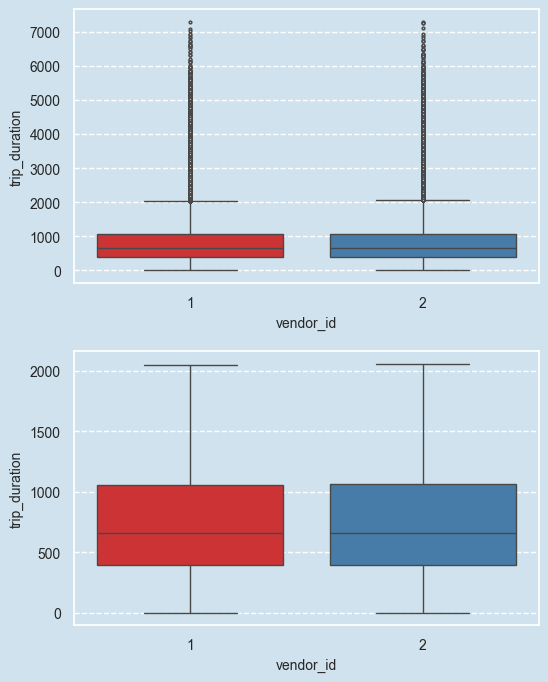

In [163]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(6, 8), 'grid.linestyle': '--'})

plt.subplots_adjust(hspace=0.25)

plt.subplot(2, 1, 1)
sns.boxplot(data=df, x='vendor_id', y='trip_duration', flierprops=dict(markerfacecolor='0.75', markersize=2), palette="Set1")

plt.subplot(2, 1, 2)
sns.boxplot(data=df, x='vendor_id', y='trip_duration', showfliers = False, palette="Set1")

<Axes: xlabel='store_and_fwd_flag', ylabel='trip_duration'>

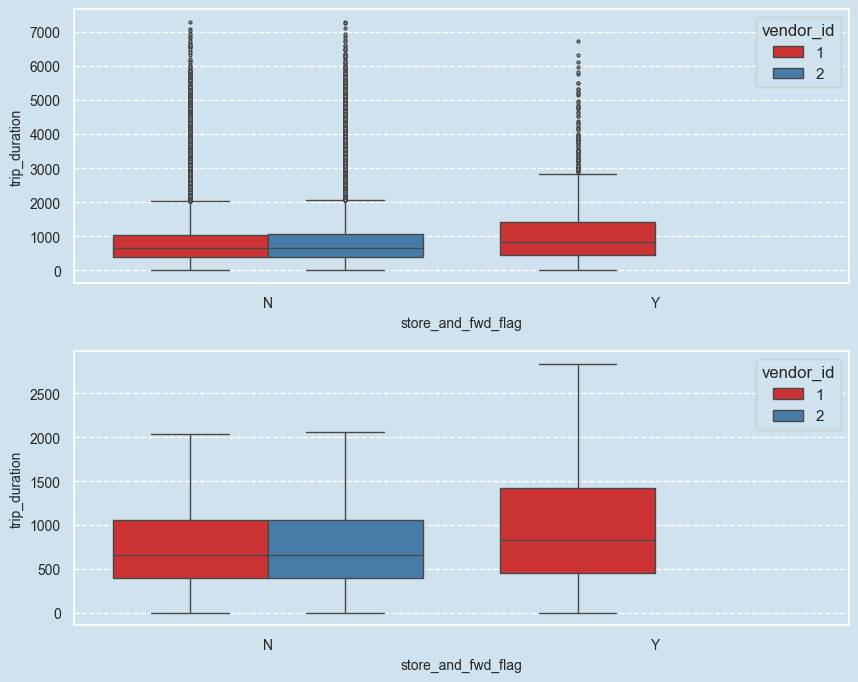

In [164]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(10, 8), 'grid.linestyle': '--'})

plt.subplots_adjust(hspace=0.25)

plt.subplot(2, 1, 1)
sns.boxplot(data=df, x='store_and_fwd_flag', y='trip_duration', hue='vendor_id', flierprops=dict(markerfacecolor='0.75', markersize=2), palette="Set1")

plt.subplot(2, 1, 2)
sns.boxplot(data=df, x='store_and_fwd_flag', y='trip_duration', hue='vendor_id', showfliers = False, palette="Set1")

#### Store and forward flag is only recorded for Vendor 1.

<Axes: xlabel='passenger_count', ylabel='trip_duration'>

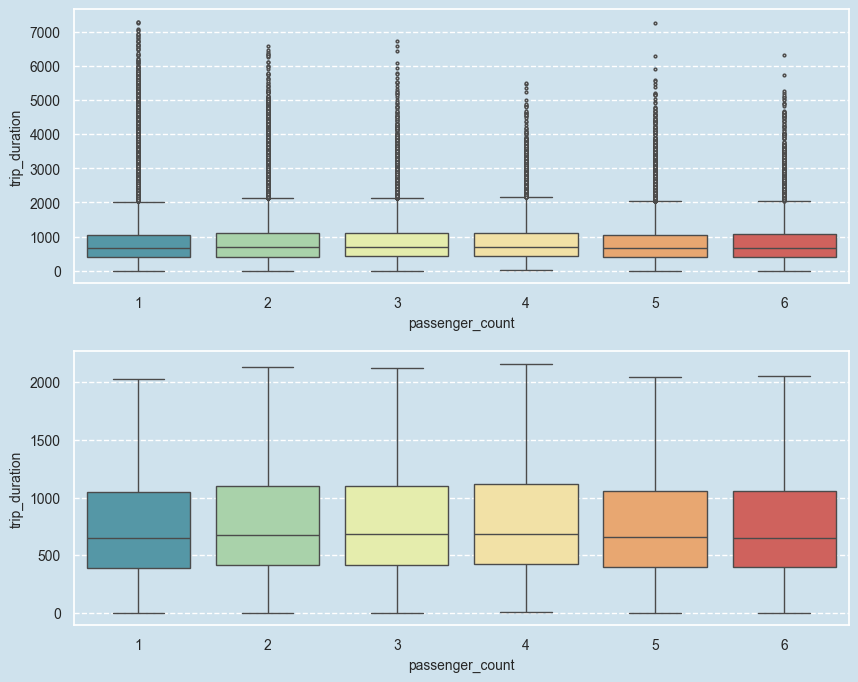

In [165]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(10, 8), 'grid.linestyle': '--'})

plt.subplots_adjust(hspace=0.25)

plt.subplot(2, 1, 1)
sns.boxplot(data=df, x='passenger_count', y='trip_duration', flierprops=dict(markerfacecolor='0.75', markersize=2), palette="Spectral_r")

plt.subplot(2, 1, 2)
sns.boxplot(data=df, x='passenger_count', y='trip_duration', showfliers = False, palette="Spectral_r")

<Axes: xlabel='pickup_hour', ylabel='passenger_count'>

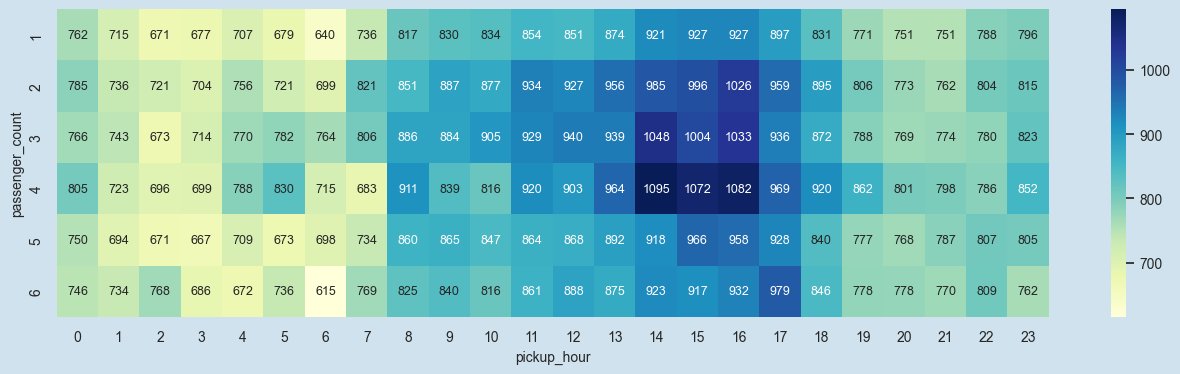

In [166]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(16, 4), 'grid.linestyle': '--'})

data_pivot = df.pivot_table(index='passenger_count', columns='pickup_hour', values='trip_duration')
data_pivot.sort_index(level=0, ascending=True, inplace=True)
sns.heatmap(data=data_pivot, square=False, annot=True, annot_kws={'size': 9}, fmt=".0f", cmap="YlGnBu")

<Axes: xlabel='pickup_hour', ylabel='trip_duration'>

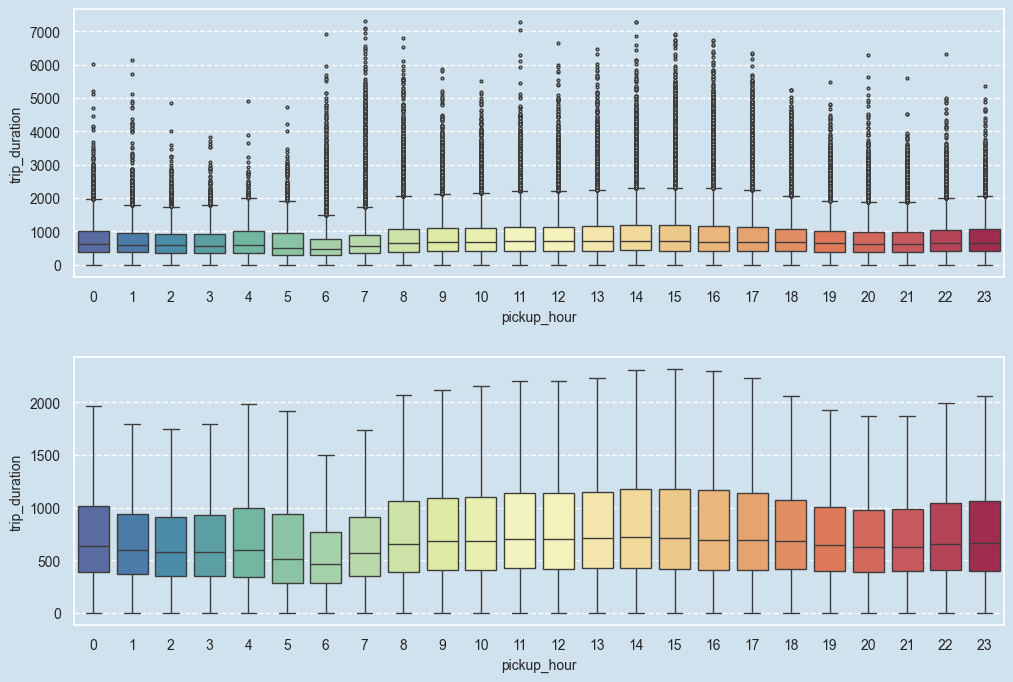

In [167]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(12, 8), 'grid.linestyle': '--'})

plt.subplots_adjust(hspace=0.3)

plt.subplot(2, 1, 1)
sns.boxplot(data=df, x='pickup_hour', y='trip_duration', flierprops=dict(markerfacecolor='0.75', markersize=2), palette="Spectral_r")

plt.subplot(2, 1, 2)
sns.boxplot(data=df, x='pickup_hour', y='trip_duration', showfliers=False, palette="Spectral_r")

<Axes: xlabel='pickup_hour', ylabel='pickup_weekday'>

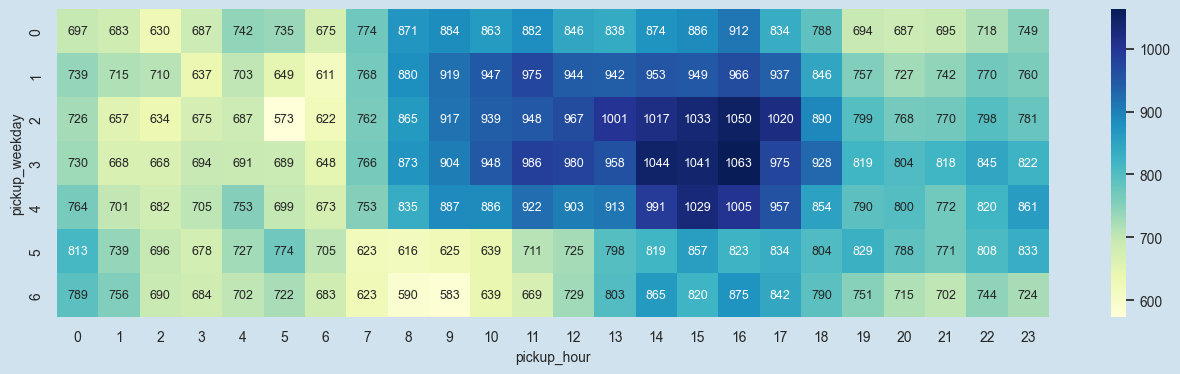

In [168]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(16, 4), 'grid.linestyle': '--'})

data_pivot = df.pivot_table(index='pickup_weekday', columns='pickup_hour', values='trip_duration')
data_pivot.sort_index(level=0, ascending=True, inplace=True)
sns.heatmap(data=data_pivot, square=False, annot=True, annot_kws={'size': 9}, fmt=".0f", cmap="YlGnBu")

<Axes: xlabel='pickup_day', ylabel='trip_duration'>

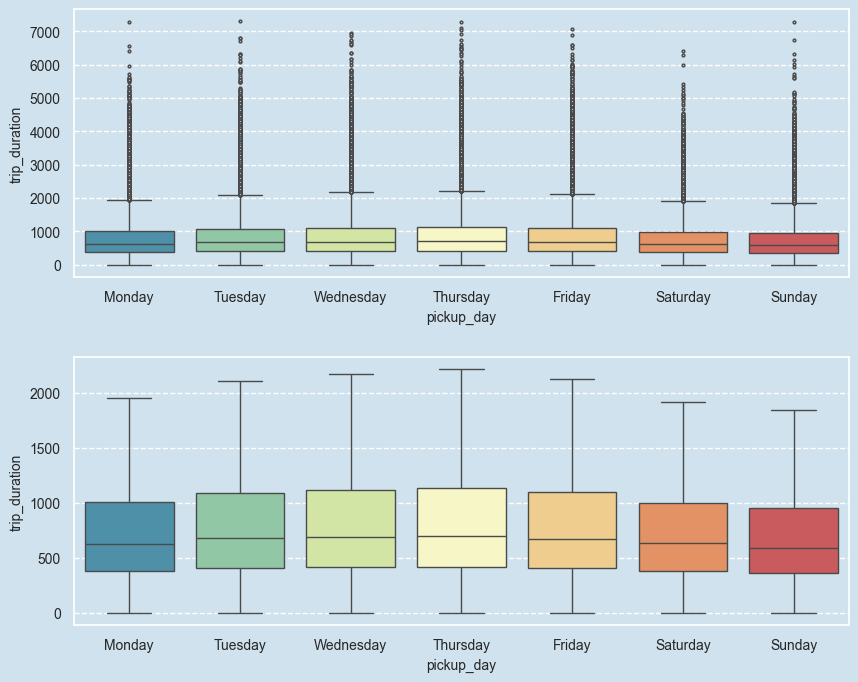

In [169]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(10, 8), 'grid.linestyle': '--'})

plt.subplots_adjust(hspace=0.3)

plt.subplot(2, 1, 1)
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.boxplot(data=df, x='pickup_day', y='trip_duration', flierprops=dict(markerfacecolor='0.75', markersize=2), order=order, palette="Spectral_r")

plt.subplot(2, 1, 2)
sns.boxplot(data=df, x='pickup_day', y='trip_duration', showfliers=False, order=order, palette="Spectral_r")

<Axes: xlabel='pickup_month', ylabel='trip_duration'>

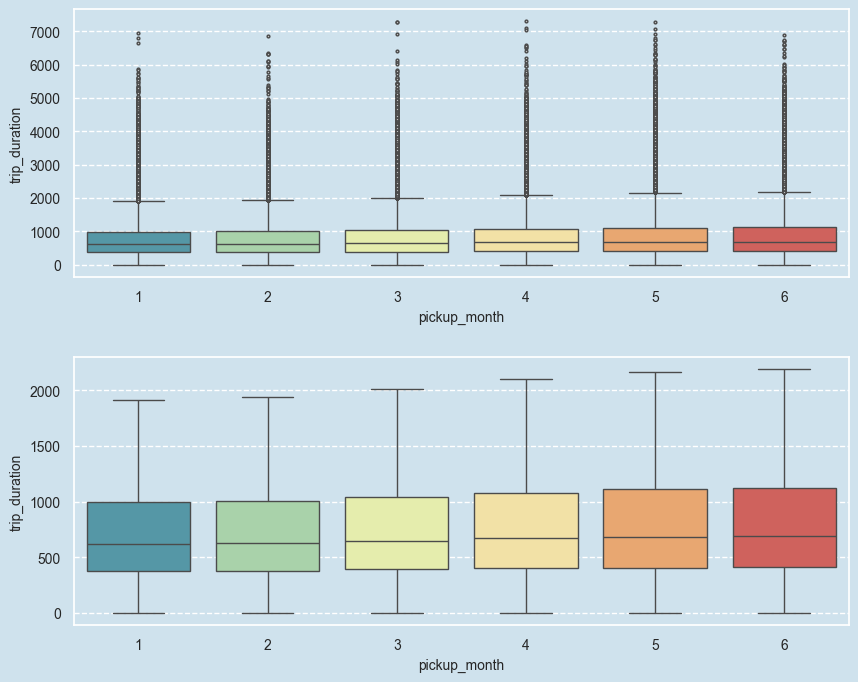

In [170]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(10, 8), 'grid.linestyle': '--'})

plt.subplots_adjust(hspace=0.3)

plt.subplot(2, 1, 1)
sns.boxplot(data=df, x='pickup_month', y='trip_duration', flierprops=dict(markerfacecolor='0.75', markersize=2), palette="Spectral_r")

plt.subplot(2, 1, 2)
sns.boxplot(data=df, x='pickup_month', y='trip_duration', showfliers=False, palette="Spectral_r")

<Axes: xlabel='pickup_hour', ylabel='pickup_month'>

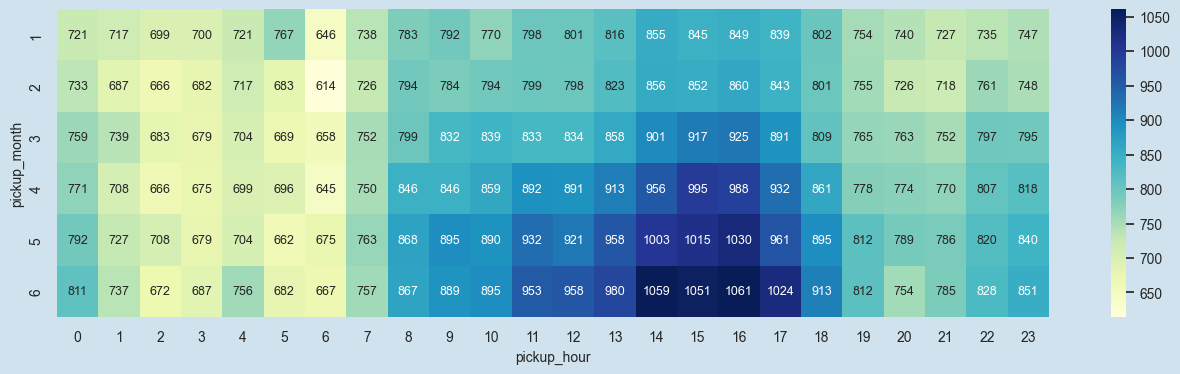

In [171]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(16, 4), 'grid.linestyle': '--'})

data_pivot = df.pivot_table(index='pickup_month', columns='pickup_hour', values='trip_duration')
data_pivot.sort_index(level=0, ascending=True, inplace=True)
sns.heatmap(data=data_pivot, square=False, annot=True, annot_kws={'size': 9}, fmt=".0f", cmap="YlGnBu")

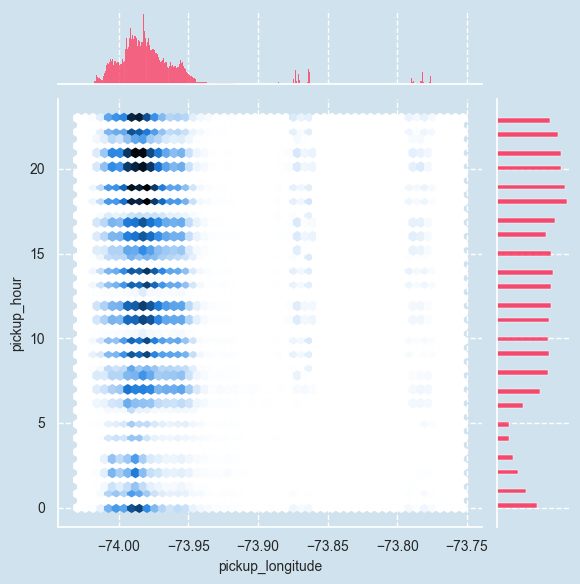

In [172]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(10, 8), 'grid.linestyle': '--'})

sns.jointplot(data=df, x=df['pickup_longitude'], y=df['pickup_hour'], kind='hex', marginal_kws={'color': "#ff1744"}, color="#1976d2")

#### Three distinctive areas: Manhattan, JFK and LaGuardia.

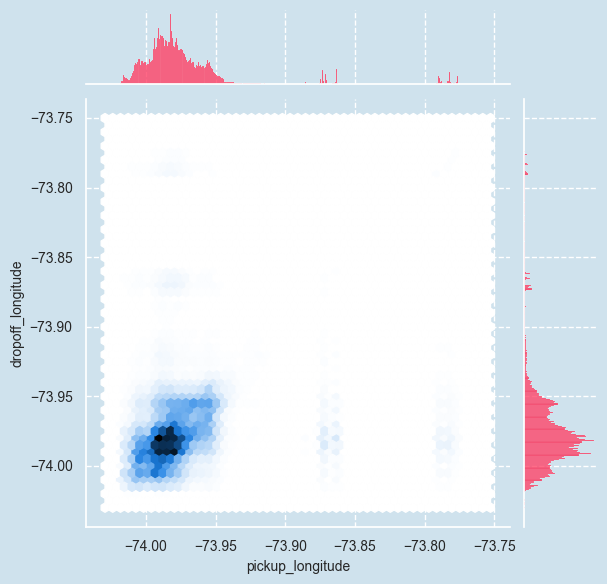

In [173]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(10, 8), 'grid.linestyle': '--'})

sns.jointplot(data=df, x=df['pickup_longitude'], y=df['dropoff_longitude'], kind='hex', marginal_kws={'color': "#ff1744"}, color="#1976d2")

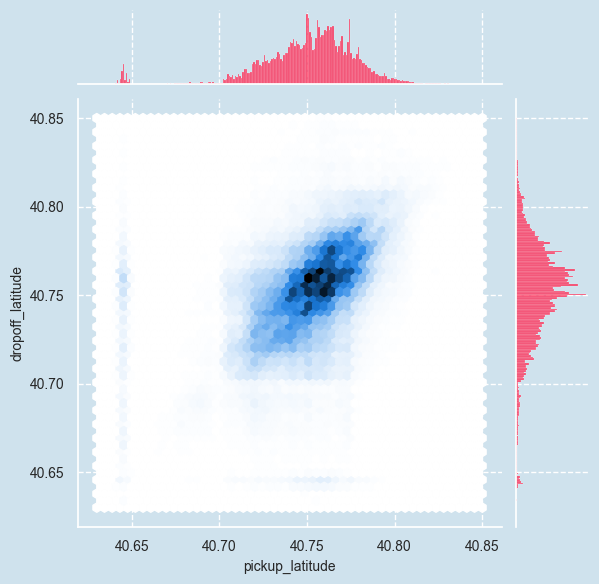

In [174]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(10, 8), 'grid.linestyle': '--'})

sns.jointplot(data=df, x=df['pickup_latitude'], y=df['dropoff_latitude'], kind='hex', marginal_kws={'color': "#ff1744"}, color="#1976d2")

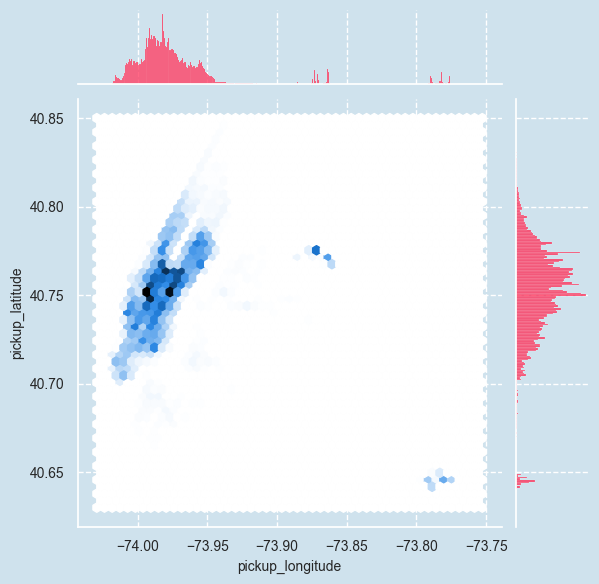

In [175]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(10, 8), 'grid.linestyle': '--'})

sns.jointplot(data=df, x=df['pickup_longitude'], y=df['pickup_latitude'], kind='hex', marginal_kws={'color': "#ff1744"}, color="#1976d2")

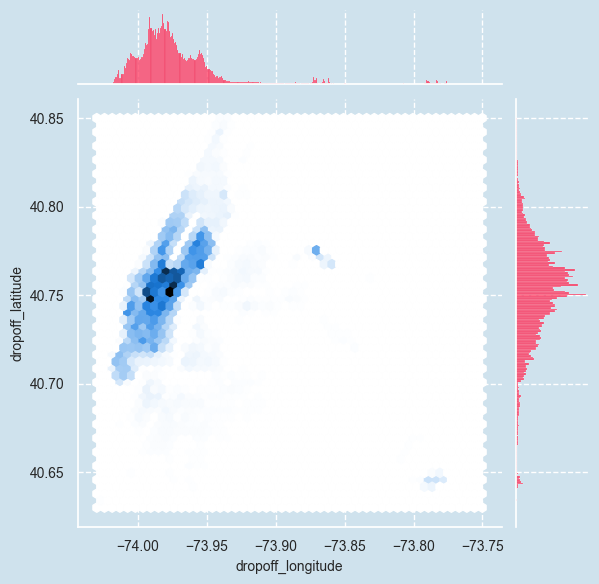

In [176]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(10, 8), 'grid.linestyle': '--'})

sns.jointplot(data=df, x=df['dropoff_longitude'], y=df['dropoff_latitude'],  kind='hex', marginal_kws={'color': "#ff1744"}, color="#1976d2")

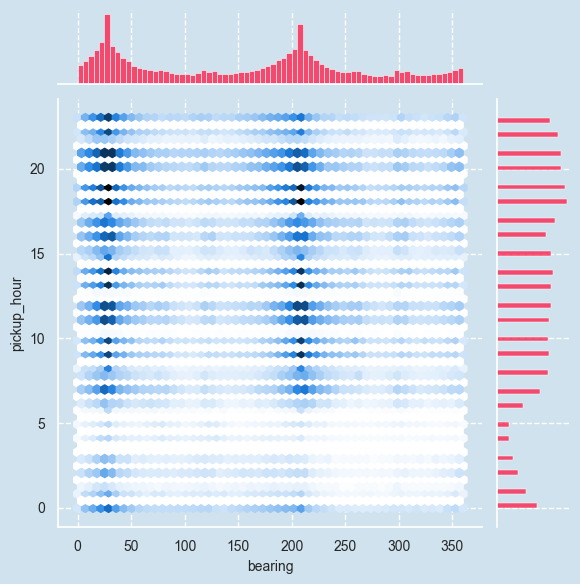

In [177]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(10, 8), 'grid.linestyle': '--'})

sns.jointplot(data=df, x=df['bearing'], y=df['pickup_hour'], kind="hex", marginal_kws={'color': "#ff1744"}, color="#1976d2")

#### - We can see two distinctive bearing angles, at about 25 and 210 degrees.
#### - These angles are inline with Manhattan's North-East and South-West directions, where the most traffic is occuring.

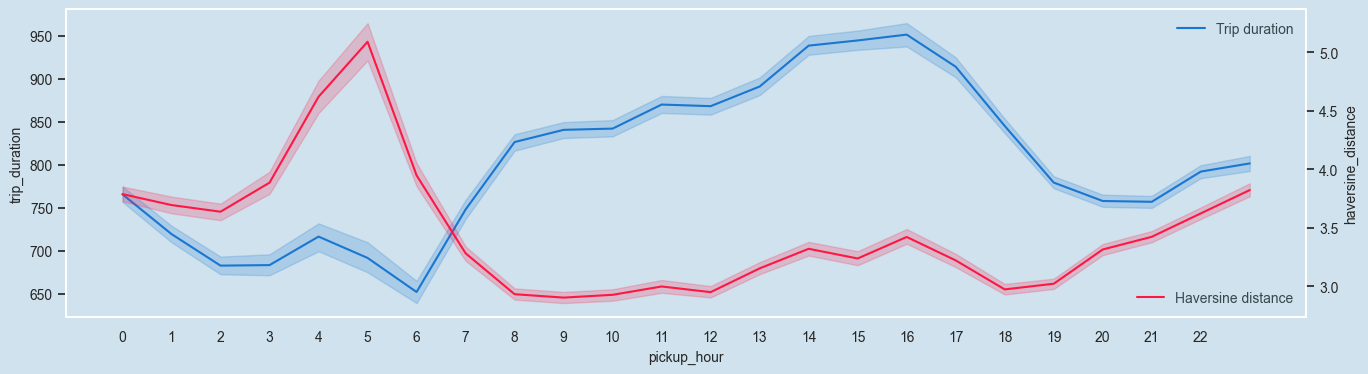

In [178]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':False, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(16, 4), 'grid.linestyle': '--'})

ax = sns.lineplot(data=df, x='pickup_hour', y='trip_duration', color="#1976d2")

ax.legend(["Trip duration"], loc='upper right', facecolor='#cfe2ed', edgecolor='white', fontsize=10, labelcolor='#37474F', frameon=False)
ax2 = ax.twinx()
sns.lineplot(data=df, x='pickup_hour', y='haversine_distance', color="#ff1744", ax=ax2)
ax2.legend(["Haversine distance"], loc='lower right', facecolor='#cfe2ed', edgecolor='white', fontsize=10, labelcolor='#37474F', frameon=False)
plt.xticks(np.arange(df['pickup_hour'].min(), df['pickup_hour'].max(), 1.0))
plt.show()

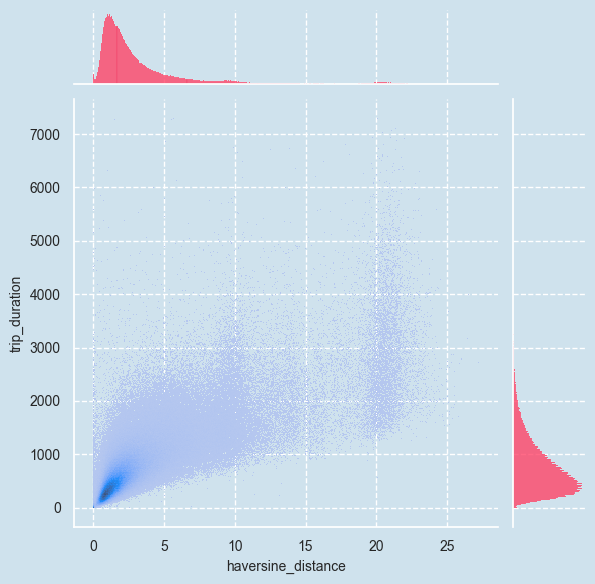

In [179]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(10, 8), 'grid.linestyle': '--'})

sns.jointplot(data=df, x=df['haversine_distance'], y=df['trip_duration'], kind="hist", marginal_kws={'color': "#ff1744"}, color="#1976d2")

## EDA Multivariable Analysis

In [180]:
numeric = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df.select_dtypes(include=numeric)
df_numeric.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_weekday,pickup_hour,pickup_month,haversine_distance,manhattan_distance,pickup_r,pickup_phi,dropoff_r,dropoff_phi,bearing
112342,2,1,-74.006615,40.731712,-73.991890,40.727161,660,5,0,1,1.341484,1.748711,1.474370,-1.067662,1.474106,-1.067625,112.183219
840803,1,3,-73.963203,40.777924,-74.004059,40.747654,1833,2,19,2,4.818762,6.813560,1.474095,-1.066935,1.474465,-1.067482,225.645152
184538,2,1,-73.987595,40.719822,-74.010994,40.716148,490,3,6,5,2.016166,2.383142,1.473979,-1.067677,1.474306,-1.067848,258.305158
512001,2,1,-73.969055,40.763618,-73.974129,40.778679,767,3,8,1,1.730221,2.104292,1.474064,-1.067117,1.474268,-1.066989,345.689279
776055,2,2,-73.950165,40.775635,-73.944534,40.779636,199,5,13,1,0.650929,0.920104,1.473876,-1.066884,1.473824,-1.066810,46.814269


<Axes: >

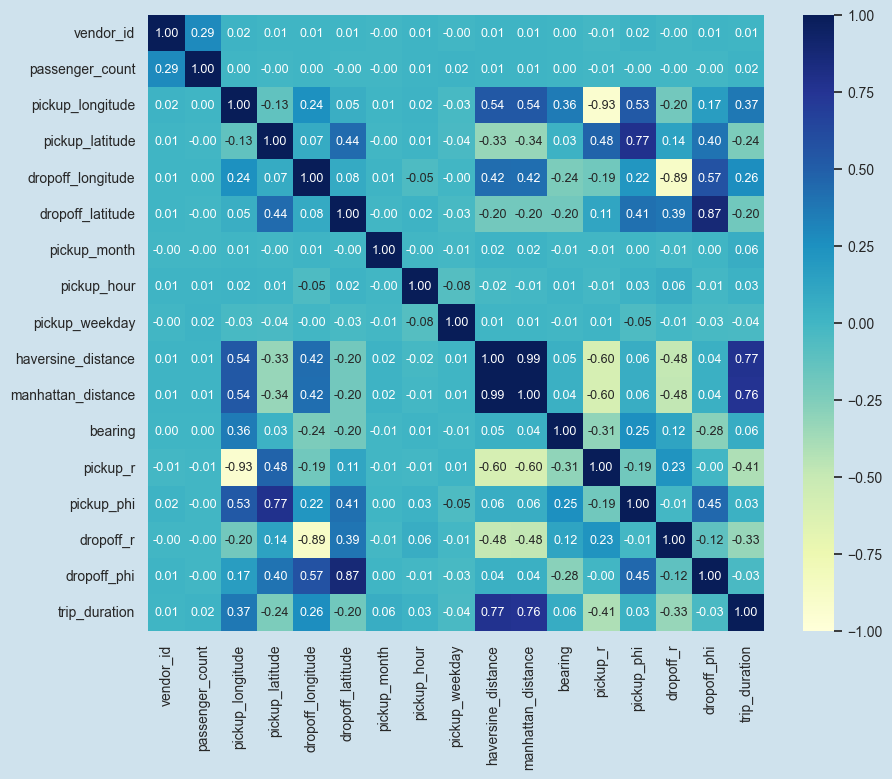

In [181]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(10, 8), 'grid.linestyle': '--'})

features_target = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
                   'pickup_month', 'pickup_hour', 'pickup_weekday',  'haversine_distance', 'manhattan_distance', 'bearing',
                   'pickup_r', 'pickup_phi', 'dropoff_r', 'dropoff_phi', 'trip_duration']
sns.heatmap(data=df[features_target].corr(), square=True, annot=True, annot_kws={'size': 9}, fmt=".2f", vmin=-1, vmax=1, cmap="YlGnBu")